# Logistic Regression for Breast Cancer Classification

This script implements logistic regression to classify breast cancer data into malignant and benign tumors.

## Dataset:
- The breast cancer dataset is loaded from sklearn.datasets.
- The dataset consists of features like mean radius, mean texture, mean smoothness, etc.

## Model:
- Logistic regression model is implemented with a sigmoid activation function.
- The model is trained using gradient descent to optimize weights and bias.

## Evaluation:
- Model evaluation includes accuracy, precision, recall, and F1 score.
- Visualization of confusion matrix.


In [65]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [66]:
# Load breast cancer dataset
data = load_breast_cancer()

In [67]:
# Split target and features
X = data.data
y = data.target

In [68]:
# Normalize the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

In [69]:
#Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Building

In [70]:
#Logistic Regression Implementation

class LogisticRegression:
    """
    Logistic regression implementation using gradient descent.

    Parameters:
    -----------
    learning_rate : float, default=0.01
        The learning rate used to update weights and bias during optimization.

    num_iterations : int, default=1000
        The number of iterations for optimization.

    Attributes:
    -----------
    weights : array-like, shape (n_features,)
        The learned weights of the logistic regression model.

    bias : float
        The learned bias term of the logistic regression model.

    losses : list
        The training loss for each iteration during optimization.

    Methods:
    --------
    sigmoid(self, z):
        Compute sigmoid of input array.

    fit(self, X, y):
        Fit logistic regression model on training data.

    predict(self, X):
        Predict the class labels for the input data.
    """

    def __init__(self, learning_rate=0.01, num_iterations=1000):
        """
        Initialize logistic regression model.

        Parameters:
        -----------
        learning_rate : float, default=0.01
            The learning rate used to update weights and bias during optimization.

        num_iterations : int, default=1000
            The number of iterations for optimization.
        """
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        """
        Compute sigmoid of input array.

        Parameters:
        -----------
        z : array-like, shape (n_samples,)
            Input array.

        Returns:
        --------
        sigmoid : array-like, shape (n_samples,)
            Sigmoid of input array.
        """
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Fit logistic regression model on training data.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            The input data.

        y : array-like, shape (n_samples,)
            The target values.
        """

        num_samples, num_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Keep track of loss for each iteration
        self.losses = []

        for i in range(self.num_iterations):
            # Forward pass
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Compute cost
            cost = -np.mean(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
            self.losses.append(cost)

            # Backward pass
            dz = y_pred - y
            dw = np.dot(X.T, dz) / num_samples
            db = np.mean(dz)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        """
        Predict the class labels for the input data.

        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            The input data.

        Returns:
        --------
        y_pred : array-like, shape (n_samples,)
            The predicted class labels.
        """
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return (y_pred > 0.5).astype(int)


Model Training

In [71]:
# Instantiate a Logistic Regression model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

Model Evaluation

In [72]:
# Make predictions using testing data
y_pred = model.predict(X_test)

In [73]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0])

In [76]:
# Calculate metrics
precision = precision_score(y_test, y_pred) *100
recall = recall_score(y_test, y_pred) *100
f1 = f1_score(y_test, y_pred) *100
accuracy = accuracy_score(y_test, y_pred) *100

# Print the results
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Accuracy: {accuracy:.2f}')

Precision: 98.61
Recall: 100.00
F1 Score: 99.30
Accuracy: 99.12


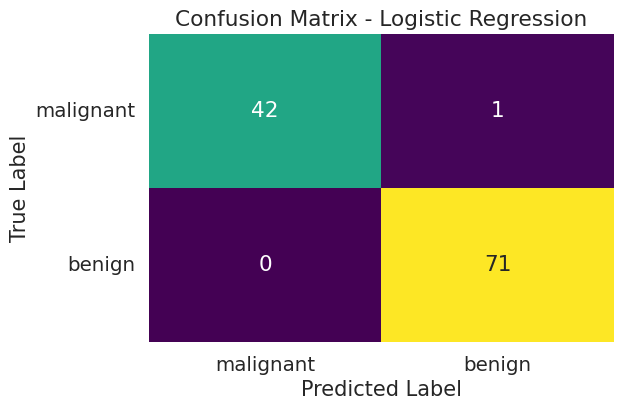

In [77]:
# Calculate the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Convert the confusion matrix into a DataFrame
matrix_df = pd.DataFrame(confusion_matrix)

# Plot the confusion matrix with a different colormap (e.g., 'viridis')
plt.figure(figsize=(6, 4))
ax = plt.axes()
sns.set(font_scale=1.3)
sns.heatmap(matrix_df,
            annot=True,
            fmt="g",
            ax=ax,
            cmap="viridis",  # Change the colormap here
            cbar=False)
ax.set_title("Confusion Matrix - Logistic Regression")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["malignant", "benign"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["malignant", "benign"], rotation=0)
plt.show()

#Conclusion
Logistic regression model exhibits outstanding performance on the breast cancer dataset, achieving a precision of 98.61%, a perfect recall of 100.00%, an impressive F1 Score of 99.30%, and an overall accuracy rate of 99.12%. These metrics collectively indicate the model's robust ability to accurately classify malignant and benign tumors, highlighting its reliability in medical diagnosis and decision-making.